In [14]:
#Importar librería
import pandas as pd
import matplotlib.pyplot as plt
from utils.utils import estrategia, estrategia_pasiva_simple, port_value_plot2, pasive_portvalue_plot2, pasiveinversion_portvalue_plot2
file_path2 = 'data/aapl_1m_test.csv'

El análisis técnico constituye una pieza fundamental en la toma de decisiones dentro del mercado financiero, proporcionando información crucial para orientar estrategias de trading efectivas. En este contexto, nuestro estudio se centra en la evaluación del rendimiento de diferentes estrategias de trading basadas en cuatro indicadores técnicos ampliamente reconocidos: el Índice de Fuerza Relativa (RSI), la Tasa de Cambio de Retorno (ROC), el Índice de Fuerza Verdadera (TSI) y el Oscilador Estocástico (SO).

Estos indicadores, pilares del análisis técnico, permiten interpretar la acción del precio y discernir tendencias en el mercado financiero. Su capacidad para identificar tanto la dirección como la fuerza de las tendencias, facilita la detección de oportunidades óptimas de compra y venta.

El objetivo de nuestra investigación es analizar minuciosamente el desempeño de diversas estrategias de trading, empleando backtesting en diferentes intervalos temporales que abarcan desde temporalidades de 1 día hasta 1 minuto. Este enfoque nos permitirá recopilar datos precisos y relevantes, esenciales para fundamentar decisiones estratégicas en el mercado financiero.

A lo largo del estudio, se detallará cada indicador técnico junto con la metodología empleada para el backtesting. Posteriormente, se presentarán y analizarán los resultados obtenidos, resaltando las conclusiones más significativas que puedan aportar valor a la práctica del trading.



## Teoria

En el análisis técnico del mercado financiero, los indicadores RSI (Relative Strength Index), ROC (Rate of Change), Stochastic Oscillator (SO) y TSI (True Strength Index) son fundamentales debido a sus capacidades para identificar tendencias, momentum y posibles puntos de reversión.

### RSI (Relative Strength Index): 
Es un indicador de momentum que mide la velocidad y cambio de los movimientos de precios. Identifica condiciones de sobrecompra y sobreventa, indicando una posible reversión bajista cuando está por encima de 70 y una posible reversión alcista cuando está por debajo de 30.

### ROC (Rate of Change):
Mide el cambio porcentual en el precio de un activo durante un período de tiempo específico. Es útil para detectar posibles puntos de inflexión en la tendencia mediante cambios bruscos en el porcentaje.

### Stochastic Oscillator (SO):
Compara el precio de cierre de un activo con su rango de precios durante un período de tiempo específico. Similar al RSI, identifica condiciones de sobrecompra y sobreventa, cruzando ciertos niveles (generalmente 80 para sobrecompra y 20 para sobreventa).

### TSI (True Strength Index): 
Combina suavizado de precios con suavizado de momentum para identificar tendencias a largo plazo y puntos de reversión. Genera señales de compra o venta al cruzar ciertos niveles y puede identificar divergencias entre el indicador y el precio.

Optuna fue seleccionado como herramienta de optimización de hiperparámetros debido a su eficiencia y facilidad de uso. Además, su integración con bibliotecas populares de Python, como Scikit-learn y TensorFlow, lo hace altamente adaptable. Optuna se relacionó con TA-Lib, ya que se utilizó para optimizar los hiperparámetros de modelos basados en los indicadores técnicos calculados con TA-Lib.

TA-Lib se utilizó por su amplia variedad de funciones para calcular indicadores técnicos comunes, como RSI y Stochastic Oscillator. Su fiabilidad, precisión y integración con Python la convierten en una herramienta sólida para el análisis técnico y la implementación de estrategias de trading.

Se tomó en cuenta una variedad de temporalidades, que abarcan desde intervalos de 1 día hasta 1 minuto y 5 minutos, con el propósito de ajustar las estrategias de trading a diversos horizontes temporales y satisfacer las necesidades específicas de scalping. Este enfoque permite una mayor flexibilidad en la aplicación de las estrategias, ya que cada intervalo de tiempo presenta características únicas en cuanto a la volatilidad y la frecuencia de los movimientos del mercado. Al considerar múltiples temporalidades, se puede obtener una visión más completa del comportamiento del mercado y tomar decisiones más informadas en función de las condiciones específicas del momento.

In [9]:
#Preparamos nuestros datasets
data_1m_test = pd.read_csv(file_path2)
data_1m_test = data_1m_test.dropna()
data_1m_test.head()

,Unnamed: 0,Timestamp,Gmtoffset,Datetime,Open,High,Low,Close,Volume
0,0,1693555200,0,2023-09-01 08:00:00,188.33,188.54,188.15,188.32,204
1,1,1693555260,0,2023-09-01 08:01:00,188.24,188.47,188.24,188.26,38
2,2,1693555320,0,2023-09-01 08:02:00,188.33,188.36,188.30,188.32,26
3,3,1693555380,0,2023-09-01 08:03:00,188.32,188.34,188.30,188.30,50
4,4,1693555440,0,2023-09-01 08:04:00,188.34,188.35,188.16,188.16,863


## Diseño

La metodología utilizada en este estudio involucró varias etapas cruciales para evaluar el rendimiento de las estrategias de trading. En primer lugar, se exploraron un total de 16 estrategias distintas, las cuales combinaban los cuatro indicadores técnicos mencionados: RSI, ROC, TSI y SO. Esta variedad de estrategias permitió una evaluación exhaustiva de diferentes enfoques para el trading en base a estos indicadores.

Posteriormente, se llevó a cabo un proceso de backtesting en cuatro marcos temporales distintos: 1 día, 1 hora, 5 minutos y 1 minuto. Esta diversidad de intervalos temporales proporcionó una visión holística de cómo funcionaban las estrategias en diferentes escalas de tiempo, desde el análisis a largo plazo hasta el intradía.

Para realizar el backtesting, se utilizaron datos históricos del valor de las acciones de Apple (AAPL), abarcando un intervalo de sesiones representativo. Esta selección de datos históricos proporcionó un contexto realista para evaluar el rendimiento de las estrategias, permitiendo obtener resultados más confiables y significativos.

Una vez completado el proceso de backtesting, se identificó una estrategia en particular que se centraba únicamente en el uso del indicador RSI. Esta estrategia se seleccionó para un análisis más profundo debido a su desempeño destacado en las pruebas iniciales.

Finalmente, se procedió a optimizar los parámetros de la estrategia basada en el indicador RSI en el marco temporal de 1 minuto utilizando la librería de optimización de hiperparámetros Optuna. Esta herramienta proporcionó una forma eficiente y efectiva de encontrar la combinación óptima de parámetros para mejorar el rendimiento de la estrategia en este intervalo temporal específico.

# Muestra de resultados de 'rsi' para todos los periodos de tiempo

In [10]:
#Mejores parametros para 1 minuto, la cual fue la mejore estrategia
best_strat_params_1m = {
    'stop_loss': 0.007096326133500339,
    'take_profit': 0.022369560033715867,
    'n_shares': 137,
    'rsi_window': 32,
    'rsi_upper': 75.26069658353647,
    'rsi_lower': 7.6399173124408195
}
portfolio_values2= estrategia(file_path2, best_strat_params_1m)

In [11]:
nombre_archivo = file_path2
data123 = pd.read_csv(nombre_archivo)
def estrategia_pasiva_simple(data, valor_inicial):
  valor_final = valor_inicial * data["Close"][len(data) - 1] / data["Close"][0]

  # Retorno de resultados
  return valor_final
valor_final_pasivo = estrategia_pasiva_simple(data123, 1000000)

EXPLICACIÓN

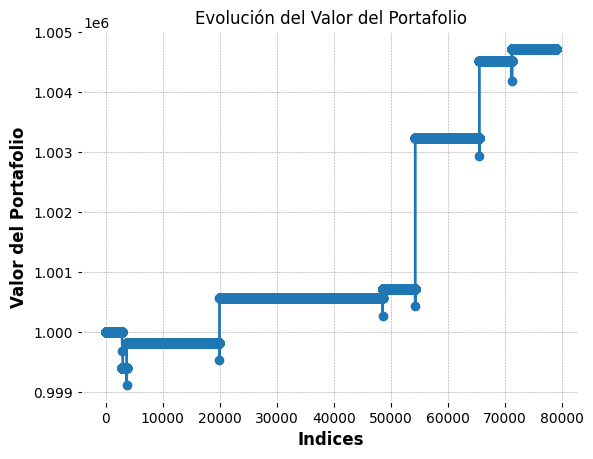

In [12]:
#plot de gráfica valor del portafolio
port_value_plot2(portfolio_values2)

EXPLICACIÓN

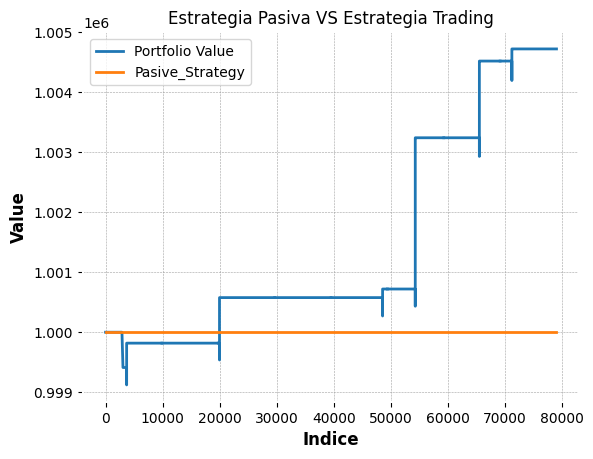

In [13]:
#plot gráfica de nuestra estrategia vs estrategia pasiva(NADA)
pasive_portvalue_plot2(portfolio_values2)

EXPLICACIÓN

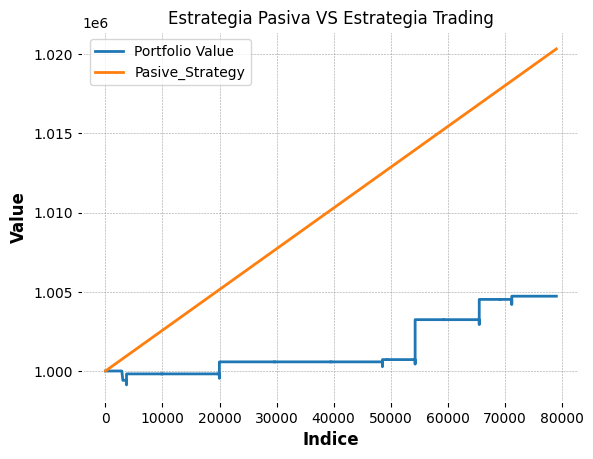

In [15]:
#plot de nuestro estrateiga vs una estrategia al haber comprado acciones en Apple el primer día
def pasiveinversion_portvalue_plot(portfolio_values, valor_ini, valor_fin):
    plt.plot(portfolio_values, label='Portfolio Value')
    indice = len(portfolio_values) - 1
    plt.plot([0,indice], [valor_ini,valor_fin], label="Pasive_Strategy")
    plt.xlabel('Indice')
    plt.ylabel('Value')
    plt.title('Estrategia Pasiva VS Estrategia Trading')
    plt.legend()
    plt.show()

pasiveinversion_portvalue_plot(portfolio_values2, 1000000, valor_final_pasivo)

EXPLICACION

CONCLUSIONES